# Import packages

In [2]:
import lab3
from lab3.experiment.group import Mouse, ExperimentGroup
from lab3.experiment.base import BehaviorExperiment, ImagingExperiment, ImagingOnlyExperiment, fetch_trials
from lab3.experiment.virtual import VirtualBehaviorMixin
from lab3.analysis.spatial.abstract_spatial_tuning import SpatialTuning
from lab3.filters.time_filters import IsRunning
from lab3.signal.dfof import Suite2pDFOF

import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
np.set_printoptions(threshold=np.inf)
# ignore cvxpy warning

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

# Load experiment information

In [3]:
expt = ImagingExperiment(trial_id=34941)

sima_path = expt.sima_path
wd_path = [] # '.../.sima/suite2p/plane0/'; this can be useful when want to bring a footprint from diffrent sima folder
if not wd_path:
    wd_path = sima_path + '/suite2p/plane0'

# Visualize ROI masks on the avg FOV

In [5]:
wd = Path(wd_path)
ops = np.load(wd/'ops.npy', allow_pickle=True).item()
stat = np.load(wd/'stat.npy', allow_pickle=True)
iscell = np.load(wd/'iscell.npy', allow_pickle=True)

Number of ROIs = 702


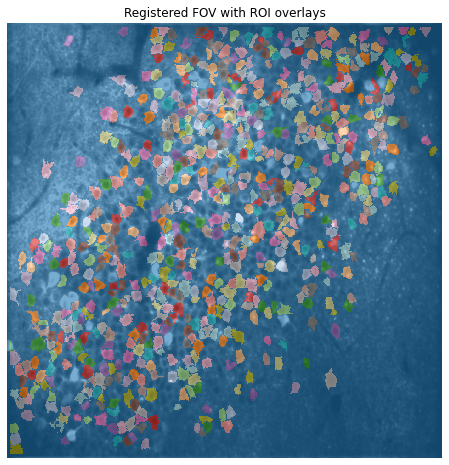

In [6]:
# Find index of ROIs defined as a "cell"
cellIndex=np.where(iscell[:,0]==True)[0]
print('Number of ROIs = {}'.format(len(cellIndex)))

# Base FOV image
image_arr = ops['meanImg']

# Create an ROI label image (each ROI assigned a unique integer)
med = [] # to collect the median (centroid) coordinate of each ROI in Suite2p output
im = np.zeros((ops['Ly'], ops['Lx']))
for isCellIndex, n in enumerate(cellIndex):
    ypix1 = stat[n]['ypix'][~stat[n]['overlap']]
    xpix1 = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix1, xpix1] = isCellIndex+1 # @Rudra, you can replace this value with different parameters such as DI or learning score such that you can check the spatial distribution of that target feature. 
    med.append(stat[n]['med'])

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(image_arr, cmap='gray', vmin=np.percentile(image_arr, 1), vmax=np.percentile(image_arr, 99))
plt.imshow(im, cmap=cm.get_cmap('tab20', len(cellIndex)), alpha=0.6, interpolation='none')
plt.axis('off')
plt.title('Registered FOV with ROI overlays')
plt.show()